# Genre Prediction

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

In [2]:
df = pd.read_csv('music.csv')
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [3]:
df.head(5)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


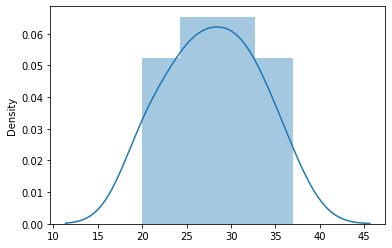

In [5]:
# Visulalizing the data
warnings.simplefilter(action='ignore', category=FutureWarning)
age_plt = sns.distplot(x= df['age'],kde = True)

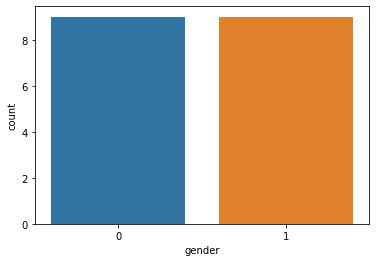

In [6]:
gender_plt = sns.countplot(x=df['gender'],data=df)

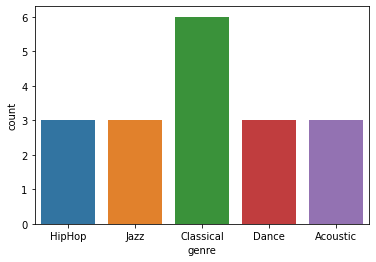

In [7]:
genere_plt = sns.countplot(x=df['genre'],data=df)

# Data Preprocessing

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Encoding the labels in Target variable

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Splitting the Dataset

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 1)

# Implementing various models for Prediction

# 1.Random Forest Classifier

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=12, max_depth = 16, random_state=2)
RFC.fit(x_train, y_train)

y_predRFC = RFC.predict(x)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y,y_predRFC))
print('Accuracy score for Random Forrest classifier is: {:.2f}'.format(accuracy_score(y,y_predRFC)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3

    accuracy                           0.94        18
   macro avg       0.95      0.93      0.93        18
weighted avg       0.96      0.94      0.94        18

Accuracy score for Random Forrest classifier is: 0.94


# Cross Validation for Random Forest Model

In [12]:
n = 5 # Number of splits for cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=n, shuffle= True, random_state=1)

def model_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

Total_accuracy = 0
for train_idx, test_idx in kf.split(df):
    x_train, x_test, y_train, y_test = x[train_idx], x[test_idx], y[train_idx], y[test_idx]
    print('Accuracy Score :',model_score(RFC,x_train, x_test, y_train, y_test))
    Total_accuracy += model_score(RFC,x_train, x_test, y_train, y_test)

print()
    
Average_accuracy = Total_accuracy/5*100
print('Average Accuracy of Random Forrest Model After Cross Validation: {} %'.format(Average_accuracy))

Accuracy Score : 0.75
Accuracy Score : 1.0
Accuracy Score : 1.0
Accuracy Score : 1.0
Accuracy Score : 1.0

Average Accuracy of Random Forrest Model After Cross Validation: 95.0 %


# 2.Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=6,loss= 'deviance', max_depth=16, random_state=3)
GBC.fit(x_train,y_train)

y_predGBC = GBC.predict(x)
print(classification_report(y,y_predGBC))
gba = accuracy_score(y,y_predGBC)*100

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         6
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.94        18
   macro avg       0.95      0.93      0.93        18
weighted avg       0.96      0.94      0.94        18



# 3.KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(weights='distance')
knn_classifier.fit(x_train, y_train)
knn_pred = knn_classifier.predict(x)

print(classification_report(y,knn_pred))
knnacc = accuracy_score(y,knn_pred)*100

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3
           3       0.75      1.00      0.86         3
           4       0.67      0.67      0.67         3

    accuracy                           0.83        18
   macro avg       0.85      0.80      0.81        18
weighted avg       0.86      0.83      0.83        18



# Results:

In [15]:
print('Best Accuracy obtained from Random Forrest Classifier')
print('Random Forrest Classifier Accuracy: {}%'.format(Average_accuracy))
print('Gradient Boosting Classifier Accuracy: {:.2f}%'.format(gba))
print('KNN Classifier Accuracy: {:.2f}%'.format(knnacc))

Best Accuracy obtained from Random Forrest Classifier
Random Forrest Classifier Accuracy: 95.0%
Gradient Boosting Classifier Accuracy: 94.44%
KNN Classifier Accuracy: 83.33%
